In [16]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
# !unzip /content/drive/MyDrive/OCR/trainset/train_pt.zip -d /content

In [1]:
import pandas as pd
df = pd.read_csv("./train_for_pt.csv")
df

,id,img_path,label
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색
1,TRAIN_00001,./train/TRAIN_00001.png,머
2,TRAIN_00002,./train/TRAIN_00002.png,차차
3,TRAIN_00003,./train/TRAIN_00003.png,써
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다
...,...,...,...
68114,TRAIN_76882,./train/TRAIN_76882.png,하나하나
68115,TRAIN_76883,./train/TRAIN_76883.png,회
68116,TRAIN_76884,./train/TRAIN_76884.png,겪다
68117,TRAIN_76885,./train/TRAIN_76885.png,벨트


In [2]:
# !pip install straug
# !apt install imagemagick

In [3]:
# 에러시 런타임 -> 런타임 다시 시작 후 여기부터 다시 실행
from straug.geometry import Rotate
from straug.noise import GaussianNoise
from straug.blur import DefocusBlur
from straug.camera import JpegCompression, Pixelate

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import random

/opt/homebrew/Caskroom/miniforge/base/envs/tr/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
np.array([[1,random.choices([0.1,-0.1, 0.2, -0.2], weights = [0.25, 0.25, 0.25, 0.25])[0],1]])

def f1(src, kernel_size=3):
    h,w,c = src.shape
    filtered_img = np.array(src)[:,:,0].view()
    filtered_img = filtered_img.reshape(h,w,1)
    
    for i in range((kernel_size//2), h-(kernel_size//2)):
        for j in range((kernel_size//2), w-(kernel_size//2)):

            middle_point = random.choices([1,2,3], weights = [0.5, 0.3, 0.2])[0]
            
#             kernel = np.array([[1,1,1],[1,middle_point,1],[1,1,1]])
            kernel_top = np.random.randint(0,1,size=[1,3])
            kernel_mid = np.array([[0,random.choices([1,1.5, 2, 3], weights = [0.4, 0.3, 0.2, 0.1])[0],0]])
            kernel_bottom = np.random.randint(0,1,size=[1,3])
            
            kernel = np.concatenate((kernel_top, kernel_mid, kernel_bottom))

            filtered_img[i, j] = int(np.clip(np.sum(np.multiply(src[i-(kernel_size//2):i+(kernel_size//2)+1, j-(kernel_size//2):j+(kernel_size//2)+1, 0], kernel)), 0, 255))
            
    filtered_img = np.repeat(filtered_img, repeats=3, axis=2)
    return filtered_img

In [5]:
def f2(src):
  h,w,c = src.shape

  img = cv2.resize(src, (w//3, h//3))
  img = cv2.resize(img, (w, h))
  return img

In [6]:
def f3(src):
    h,w,c = src.shape
    noise = np.random.randint(-55,0, size=(h,w,1))
    noise2 = np.append(noise, noise, axis=2)
    noise_type1 = np.append(noise2, noise, axis=2)
    return np.clip(noise_type1+src, 0, 255)

In [7]:
def rotate(src):
    aug_prob = 1 # 원하는 확률 선택
    if random.random() < aug_prob:
        img = Rotate()(src.convert("LA"))
    return img

In [8]:
df = pd.read_csv("./train_for_pt.csv")

In [29]:
# %cd /content/parseq

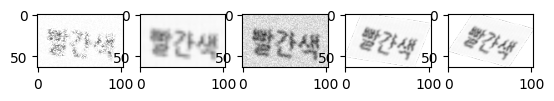

In [9]:
img = Image.open(f'{df["img_path"][0]}')
ar = np.array(img)

aug1 = f1(ar)
aug2 = f2(ar)
aug3 = f3(ar)

rot = rotate(img)
rot2 = rotate(img)

plt.subplot(151)
plt.imshow(aug1)
plt.subplot(152)
plt.imshow(aug2)
plt.subplot(153)
plt.imshow(aug3)
plt.subplot(154)
plt.imshow(rot)
plt.subplot(155)
plt.imshow(rot2)
plt.show()

In [10]:
for idx in range(len(df)):
    img = Image.open(f'{df["img_path"][idx]}')
    label = df['label'][idx]

    aug1 = rotate(img)
    aug2 = rotate(img)

    aug1.save(f'./train/{df["id"][idx]}_1.png', 'png')
    aug2.save(f'./train/{df["id"][idx]}_2.png', 'png')

    aug_df = pd.DataFrame({
        'id' : [f'{df["id"][idx]}_1', f'{df["id"][idx]}_2'],
        'img_path': [f'./train/{df["id"][idx]}_1.png', f'./train/{df["id"][idx]}_2.png'],
        'label' : [label, label]
    })
    df = pd.concat([df, aug_df])
    df = df.reset_index(drop=True)
df

,id,img_path,label
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색
1,TRAIN_00001,./train/TRAIN_00001.png,머
2,TRAIN_00002,./train/TRAIN_00002.png,차차
3,TRAIN_00003,./train/TRAIN_00003.png,써
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다
...,...,...,...
204352,TRAIN_76884_2,./train/TRAIN_76884_2.png,겪다
204353,TRAIN_76885_1,./train/TRAIN_76885_1.png,벨트
204354,TRAIN_76885_2,./train/TRAIN_76885_2.png,벨트
204355,TRAIN_76887_1,./train/TRAIN_76887_1.png,자리


In [11]:
for idx in range(len(df)):
    img = Image.open(f'{df["img_path"][idx]}')
    label = df['label'][idx]
    ar = np.array(img)

    aug1 = f1(ar)
    aug2 = f2(ar)

    aug1 = Image.fromarray(aug1)
    aug2 = Image.fromarray(aug2)

    aug1.save(f'./train/{df["id"][idx]}_a.png', 'png')
    aug2.save(f'./train/{df["id"][idx]}_b.png', 'png')

    aug_df = pd.DataFrame({
        'id' : [f'{df["id"][idx]}_a', f'{df["id"][idx]}_b'],
        'img_path': [f'./train/{df["id"][idx]}_a.png', f'./train/{df["id"][idx]}_b.png'],
        'label' : [label, label]
    })
    df = pd.concat([df, aug_df])
    df = df.reset_index(drop=True)
df

KeyboardInterrupt: 

In [12]:
df

,id,img_path,label
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색
1,TRAIN_00001,./train/TRAIN_00001.png,머
2,TRAIN_00002,./train/TRAIN_00002.png,차차
3,TRAIN_00003,./train/TRAIN_00003.png,써
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다
...,...,...,...
494214,TRAIN_43380_2_b,./train/TRAIN_43380_2_b.png,치다
494215,TRAIN_43381_1_a,./train/TRAIN_43381_1_a.png,곳
494216,TRAIN_43381_1_b,./train/TRAIN_43381_1_b.png,곳
494217,TRAIN_43381_2_a,./train/TRAIN_43381_2_a.png,곳


In [13]:
df.to_csv('./train_pt.csv', index=False)

In [ ]:
# !zip -r /content/drive/MyDrive/OCR/trainset/trainset_pt.zip /content/train_pt.csv /content/train/d